In [2]:
from numpy import loadtxt
import numpy as np
import pandas as pd
from keras import models
from keras import Sequential
from keras.layers import Dense
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
dataframe = pd.read_csv('pima-indians-diabetes.csv', delimiter = ',')
dataframe.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
#split into input(x) and output y variables
X = dataframe.iloc[:, :8]
y = dataframe.iloc[:, 8]
dataframe.shape

(767, 9)

In [9]:
features_train,features_test,target_train,target_test=train_test_split(X,y,test_size=0.33,random_state=0)
network = models.Sequential()
network.add(Dense(units = 8, activation = "relu", input_shape = (features_train.shape[1],)))
network.add(Dense(units = 8, activation = "relu"))
network.add(Dense(units = 1, activation = "sigmoid"))
#compile the keras model
network.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#fit the keras model on the dataset
history = network.fit(features_train, target_train, epochs = 20, verbose = 1, batch_size = 100, validation_data = (features_test, target_test))

Epoch 1/20
6/6 [==============================] - 1s 31ms/step - loss: 4.4868 - accuracy: 0.3957 - val_loss: 3.7862 - val_accuracy: 0.4055
Epoch 2/20
6/6 [==============================] - 0s 4ms/step - loss: 2.7352 - accuracy: 0.4425 - val_loss: 2.7138 - val_accuracy: 0.5315
Epoch 3/20
6/6 [==============================] - 0s 6ms/step - loss: 2.1753 - accuracy: 0.5283 - val_loss: 2.5266 - val_accuracy: 0.5866
Epoch 4/20
6/6 [==============================] - 0s 5ms/step - loss: 2.1798 - accuracy: 0.6062 - val_loss: 2.4302 - val_accuracy: 0.5906
Epoch 5/20
6/6 [==============================] - 0s 5ms/step - loss: 1.9933 - accuracy: 0.5731 - val_loss: 2.1783 - val_accuracy: 0.5866
Epoch 6/20
6/6 [==============================] - 0s 3ms/step - loss: 1.7329 - accuracy: 0.5497 - val_loss: 2.0771 - val_accuracy: 0.5472
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 1.6385 - accuracy: 0.5205 - val_loss: 1.9812 - val_accuracy: 0.5315
Epoch 8/20
6/6 [=================

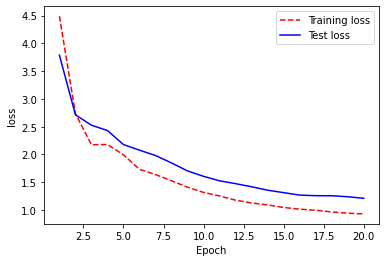

In [10]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss)+1)
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [11]:
_,accuracy = network.evaluate(features_train, target_train)
print('Accuracy : %.2f'%(accuracy*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.9184 - accuracy: 0.6238
Accuracy : 62.38


In [13]:
#predict using the keras model
predicted_target = network.predict(features_test)
_,accuracy = network.evaluate(features_test, target_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 0s/step - loss: 1.2114 - accuracy: 0.5906
Accuracy: 59.06


In [14]:
#Y = target_train
for i in range(10):
    print(predicted_target[i])

[0.2243309]
[0.12578572]
[0.99667984]
[0.9962766]
[0.14154027]
[0.91503423]
[0.37973294]
[0.9775541]
[0.9256355]
[0.27721944]


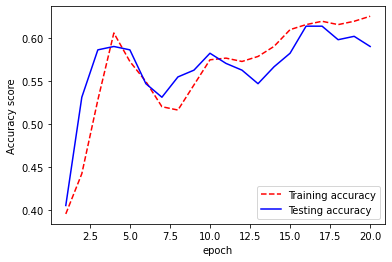

In [15]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training accuracy", "Testing accuracy"])
plt.xlabel("epoch")
plt.ylabel("Accuracy score")
plt.show()
